In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from pathlib import Path

repo_root = Path.cwd().parent
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))


from utils.videos import Video
from utils.dataset import DataSet


In [2]:
# base folder
folder_data = '/home/anaflo/MDMC/thesis/sensorium/data/'

# results folder
folder_results = '/home/anaflo/MDMC/thesis/sensorium/intermediate_results/'

# mice/recording folders
all_recording_folders = [
    'dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce',
    'dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce',
    'dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce',
    'dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce',
    'dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce',
]


In [3]:
# Inizialize and object from DataSet to handle the dataset
dat = DataSet(folder_data, folder_metadata_per_trial=folder_results, verbose=False)
print(dat)

The dataset contains 5 recordings:
  - dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce with 7671 neurons recorded, 714 trials, and 403 samples per trial
  - dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce with 7495 neurons recorded, 723 trials, and 315 samples per trial
  - dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce with 8285 neurons recorded, 729 trials, and 325 samples per trial
  - dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce with 7440 neurons recorded, 720 trials, and 324 samples per trial
  - dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce with 7928 neurons recorded, 704 trials, and 324 samples per trial



In [4]:
trials_df = dat.get_trials_metadata_per_trials()


Loading trials from metadata /home/anaflo/MDMC/thesis/sensorium/intermediate_results/ for videos ---


# Check classification performance

### Un-classified trials

In [5]:
n = np.sum(dat.trials_df['label']=="unknown")
print(f"Classification failed in {n} trials")

Classification failed in 0 trials


### Trials with segments with bad properties detected

In [6]:
n = np.sum(dat.trials_df['segments_bad_n']>0)
print(f"{n} trials with bad segment properties detected")

1 trials with bad segment properties detected


In [8]:
dat.trials_df[dat.trials_df['segments_bad_n']>0]

,recording,trial,trial_type,first_label,label,ID,sampling_freq,valid_frames,peaks,n_peaks,segments_n_peaks,segments_bad_n,segments_avg_duration
111,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,668,train,NaturalImages,NaturalImages,None,30,403,"[13, 29, 140, 155, 171, 186, 201, 217, 235, 25...",19,20,1,20.15


Metadata loaded from metadata per trial


,frame_start,frame_end,duration,transition_start,transition_end,max_change,is_static,intensity_range,margin_left,margin_right,margin_top,margin_bottom,background_color,background_proportion,is_uniform,bad_properties
0,0,14,14,1,0,0.000000,True,0.000000,64,64,36,36,128.000000,0.996086,True,False
1,14,30,16,0,0,36.641811,True,166.750000,0,0,0,0,50.698040,0.019995,False,False
2,30,141,111,0,0,5.003804,True,11.980881,64,64,36,36,128.000000,0.988970,True,True
3,141,156,15,0,0,0.973294,True,249.812500,0,0,0,0,111.937256,0.019196,False,False
4,156,172,16,1,0,7.095246,True,10.480087,64,64,36,36,128.000000,0.937030,True,False
5,172,187,15,0,0,2.518336,True,242.000000,0,0,0,0,96.878433,0.011183,False,False
6,187,202,15,1,0,0.000000,True,0.000000,64,64,36,36,128.000000,0.996086,True,False
7,202,218,16,1,0,10.346995,True,233.625000,0,0,0,0,1.505883,0.054877,False,False
8,218,236,18,0,1,8.346907,True,7.640099,64,64,36,36,128.000000,0.942172,True,False
9,236,251,15,0,0,3.373837,True,210.812500,0,0,0,0,249.474518,0.011298,False,False


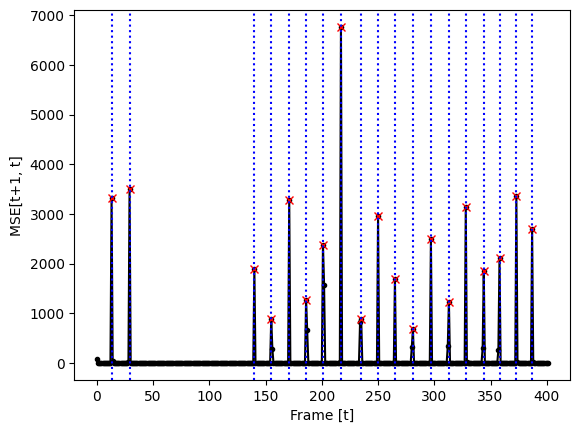

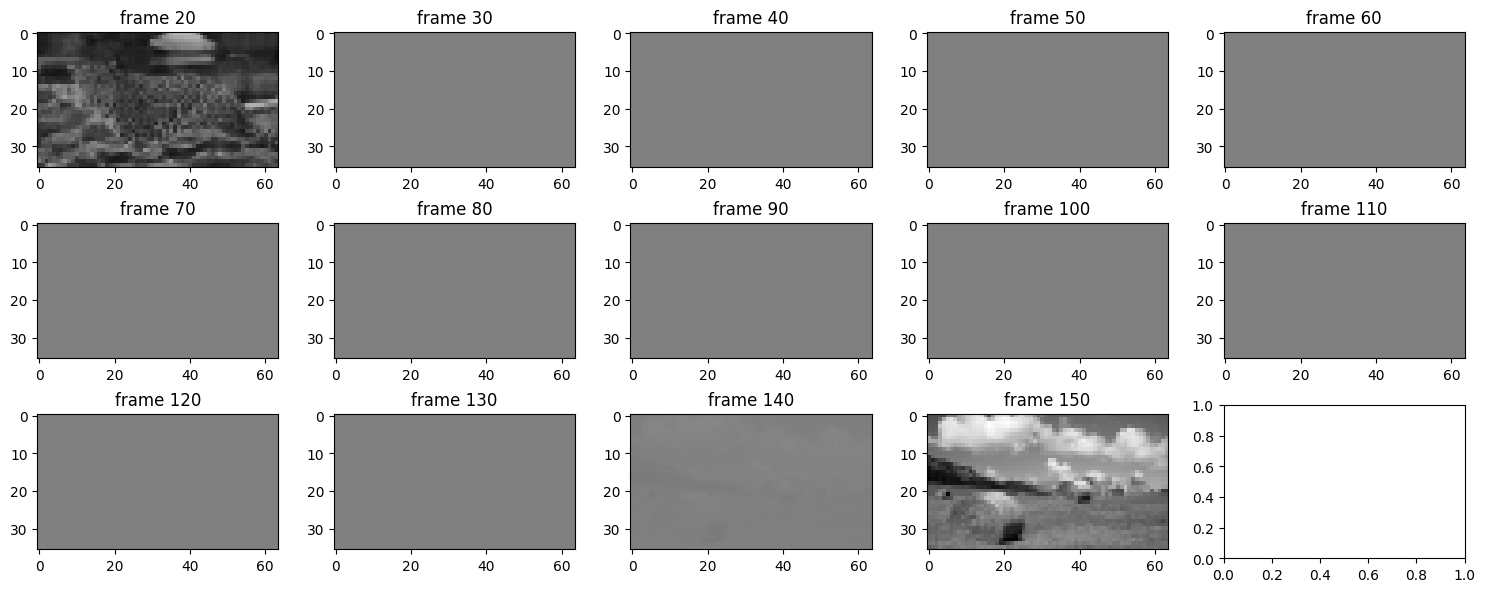

In [11]:
video = dat.load_video_by_trial('dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce','668', try_global_first=False)
fig, ax = video.plot_changes()
display(video.print_segments_table())
frames_plot = np.arange(20, 160, 10).tolist()
fig, ax = video.plot_frames(frames_plot)

### Check exchanges between clases in first and second classification

In [6]:
labels = ['NaturalVideo','NaturalImages','GaussianDot','Gabor','PinkNoise','RandomDots']
videos_df = dat.trials_df
errors = []
for label in labels:

    print(f'\nChanges in classification for label {label}...')
    df = videos_df[videos_df['label']==label]

    # get the number of differences between first and last classification
    idx = df['label'].to_numpy()!=df['first_label'].to_numpy()
    print(f"Number of changes in classification between first and last classification: {np.sum(idx)}")

    # store the videos with errors
    if len(errors)==0:
        errors = df[idx].copy()
    else:
        errors = pd.concat([errors, df[idx]], axis=0)

    # see with which classes is exchanged
    if len(errors)>0:
        counts = df[idx]["first_label"].value_counts()
        print(f"Number of trials exchanged with {label} for each label")
        print(counts)



Changes in classification for label NaturalVideo...
Number of changes in classification between first and last classification: 0

Changes in classification for label NaturalImages...
Number of changes in classification between first and last classification: 0

Changes in classification for label GaussianDot...
Number of changes in classification between first and last classification: 0

Changes in classification for label Gabor...
Number of changes in classification between first and last classification: 0

Changes in classification for label PinkNoise...
Number of changes in classification between first and last classification: 0

Changes in classification for label RandomDots...
Number of changes in classification between first and last classification: 10
Number of trials exchanged with RandomDots for each label
first_label
NaturalVideo    10
Name: count, dtype: int64


In [7]:
errors

,recording,trial,trial_type,first_label,label,ID,sampling_freq,valid_frames,n_peaks,segments_n_peaks,segments_bad_n,segments_avg_duration
2369,dynamic29156-11-10-Video-8744edeac3b4d1ce16b68...,674,train,NaturalVideo,RandomDots,None,30,240,3,4,0,60.0
2419,dynamic29156-11-10-Video-8744edeac3b4d1ce16b68...,367,train,NaturalVideo,RandomDots,None,30,240,3,4,0,60.0
2464,dynamic29156-11-10-Video-8744edeac3b4d1ce16b68...,91,train,NaturalVideo,RandomDots,None,30,240,3,4,0,60.0
2479,dynamic29156-11-10-Video-8744edeac3b4d1ce16b68...,386,final_test_bonus,NaturalVideo,RandomDots,None,30,240,3,4,0,60.0
2492,dynamic29156-11-10-Video-8744edeac3b4d1ce16b68...,255,train,NaturalVideo,RandomDots,None,30,240,3,4,0,60.0
2551,dynamic29156-11-10-Video-8744edeac3b4d1ce16b68...,161,final_test_bonus,NaturalVideo,RandomDots,None,30,240,3,4,0,60.0
2641,dynamic29156-11-10-Video-8744edeac3b4d1ce16b68...,497,train,NaturalVideo,RandomDots,None,30,240,3,4,0,60.0
2687,dynamic29156-11-10-Video-8744edeac3b4d1ce16b68...,444,final_test_bonus,NaturalVideo,RandomDots,None,30,240,3,4,0,60.0
2834,dynamic29156-11-10-Video-8744edeac3b4d1ce16b68...,283,final_test_bonus,NaturalVideo,RandomDots,None,30,240,3,4,0,60.0
2866,dynamic29156-11-10-Video-8744edeac3b4d1ce16b68...,278,train,NaturalVideo,RandomDots,None,30,240,3,4,0,60.0


# Check occurrences of classes 

### Compute number of occurences for each class

Number of occurences across all recordings:
           label  count
0   NaturalVideo   2653
1     RandomDots    238
2  NaturalImages    178
3    GaussianDot    177
4          Gabor    176
5      PinkNoise    168


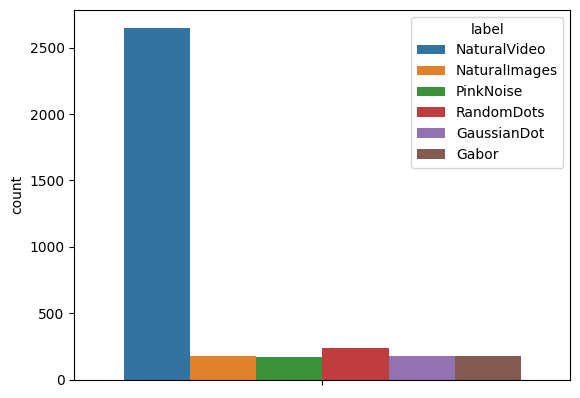

In [8]:
labels_order=["NaturalVideo", "NaturalImages", "PinkNoise","RandomDots","GaussianDot","Gabor"]

# Over all recordings
print("Number of occurences across all recordings:")
counts = videos_df["label"].value_counts()

counts_df = counts.reset_index()
counts_df.columns = ["label", "count"]
print(counts_df)
sns.barplot(data=counts_df, y="count", hue="label", hue_order=labels_order)
plt.show()


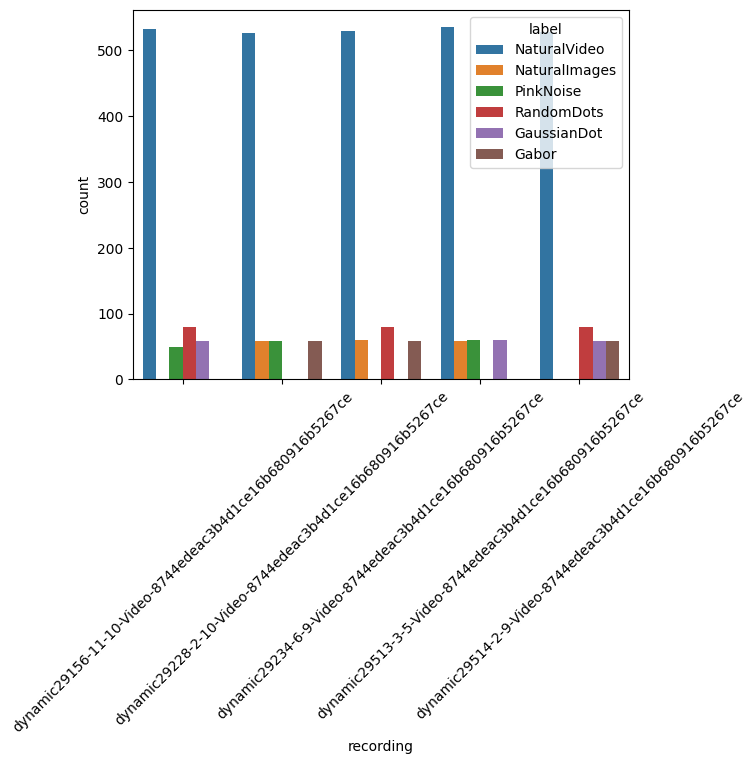

In [9]:
labels_order=["NaturalVideo", "NaturalImages", "PinkNoise","RandomDots","GaussianDot","Gabor"]
rec_order = all_recording_folders
counts = videos_df.value_counts(subset=["recording","label"])
counts_df = counts.reset_index()
counts_df.columns = ["recording", "label", "count"]
sns.barplot(data=counts_df, x="recording", y="count", hue="label", order=rec_order, hue_order=labels_order)
plt.xticks(rotation=45)
plt.show()



Number of occurences for recording dynamic29156-11-10...


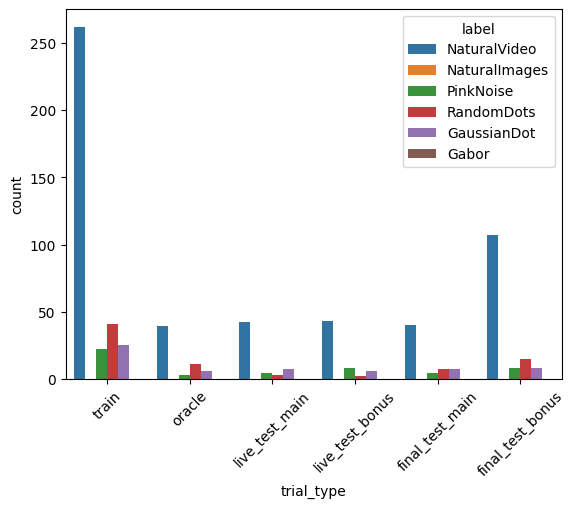


Number of occurences for recording dynamic29228-2-10-...


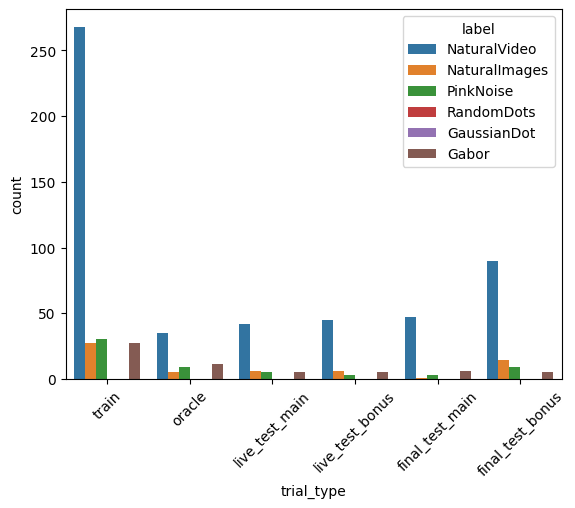


Number of occurences for recording dynamic29234-6-9-V...


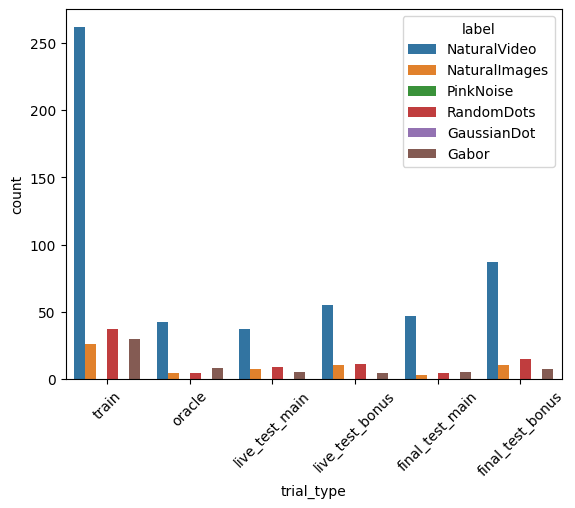


Number of occurences for recording dynamic29513-3-5-V...


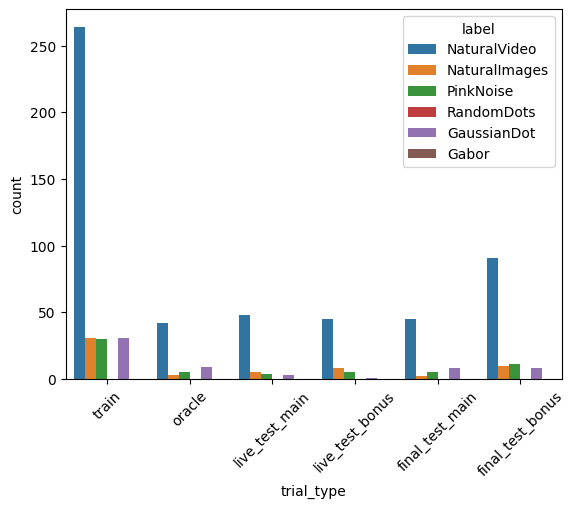


Number of occurences for recording dynamic29514-2-9-V...


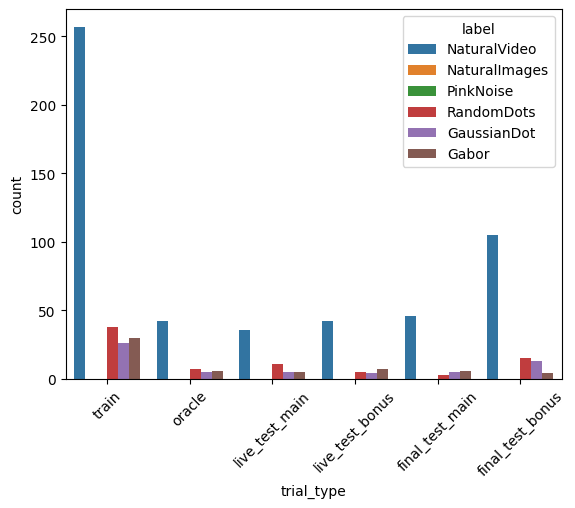

In [10]:
labels_order=["NaturalVideo", "NaturalImages", "PinkNoise","RandomDots","GaussianDot","Gabor"]
trials_order = ["train", "oracle","live_test_main","live_test_bonus","final_test_main","final_test_bonus"]
for recording_folder in all_recording_folders:
    print('\n=============================================')
    print(f'Number of occurences for recording {recording_folder[0:18]}...')
    df = videos_df[videos_df['recording']==recording_folder]
    counts = df.value_counts(subset=["label","trial_type"])
    
    counts_df = counts.reset_index()
    counts_df.columns = ["label","trial_type", "count"]
    sns.barplot(data=counts_df, x="trial_type", y="count", hue="label", order=trials_order, hue_order=labels_order)
    plt.xticks(rotation=45)
    plt.show()

### Compute the number of occurences for each class in each phase

# Inspect some trials

Metadata loaded from metadata per trial


,frame_start,frame_end,duration,transition_start,transition_end,max_change,is_static,intensity_range,margin_left,margin_right,margin_top,margin_bottom,background_color,background_proportion,is_uniform,bad_properties
0,0,25,25,0,0,82.268126,False,216.629059,22,22,8,8,128.0,0.640643,False,False
1,25,50,25,0,0,37.135865,True,216.591492,22,22,8,8,128.0,0.644274,False,False
2,50,75,25,0,0,107.286536,False,188.393524,23,23,9,9,128.0,0.645139,False,False
3,75,100,25,0,0,4.588686,True,219.687424,22,22,9,9,128.0,0.640971,False,False
4,100,125,25,0,0,12.690914,True,223.186203,22,22,8,8,128.0,0.638014,False,False
5,125,150,25,0,0,78.631065,False,212.224655,22,22,8,8,128.0,0.640383,False,False
6,150,175,25,0,0,36.442256,True,214.120697,22,22,8,8,128.0,0.639709,False,False
7,175,200,25,0,0,100.398967,False,182.283936,23,23,9,9,128.0,0.649047,False,False
8,200,225,25,0,0,36.257088,True,214.234909,22,22,8,8,128.0,0.640228,False,False
9,225,250,25,0,0,97.622766,False,181.393387,23,23,9,9,128.0,0.647076,False,False


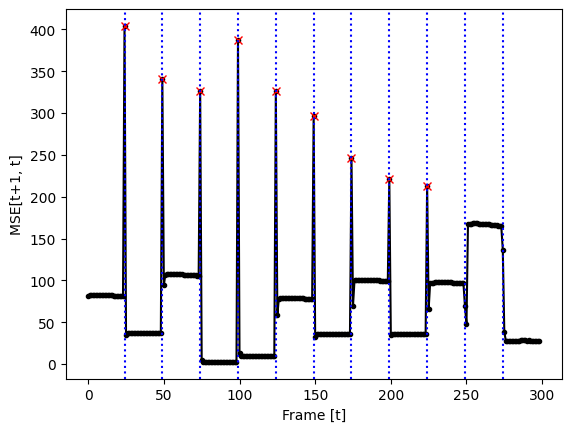

In [11]:
video = dat.load_video_by_trial(all_recording_folders[4],'410', try_global_first=False)
fig, ax = video.plot_changes()
display(video.print_segments_table())


Metadata loaded from metadata per trial
GaussianDot


,frame_start,frame_end,duration,transition_start,transition_end,max_change,is_static,intensity_range,margin_left,margin_right,margin_top,margin_bottom,background_color,background_proportion,is_uniform,bad_properties
0,0,9,9,0,0,0.000000,True,126.265625,28,22,21,1,128.0,0.769546,False,False
1,9,18,9,0,0,0.083504,True,126.453125,15,34,4,17,128.0,0.738322,False,False
2,18,27,9,0,0,0.340587,True,129.825241,44,5,1,20,128.0,0.729675,False,False
3,27,36,9,0,0,0.771252,True,129.620270,25,24,4,17,128.0,0.732125,False,False
4,36,45,9,0,0,1.364606,True,132.390640,47,2,4,17,128.0,0.725160,False,False
5,45,54,9,0,0,2.147251,True,132.156708,28,21,7,14,128.0,0.718243,False,False
6,54,63,9,0,0,0.688730,True,126.453125,31,18,4,17,128.0,0.743174,False,False
7,63,72,9,0,0,4.651830,True,134.706406,28,21,17,4,128.0,0.686443,False,False
8,72,81,9,0,0,2.574079,True,126.906250,31,18,11,10,128.0,0.666267,False,False
9,81,90,9,0,0,6.675504,True,127.453125,18,31,1,20,128.0,0.712719,False,False


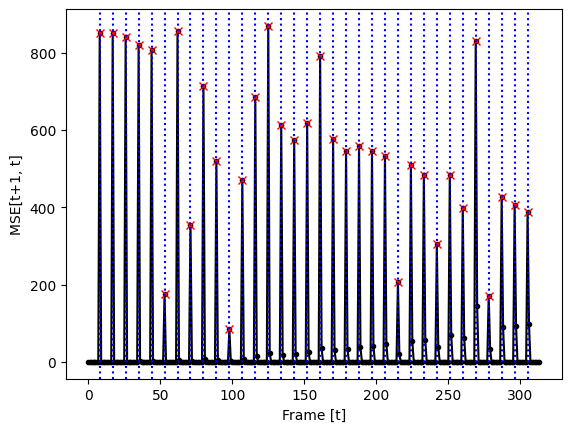

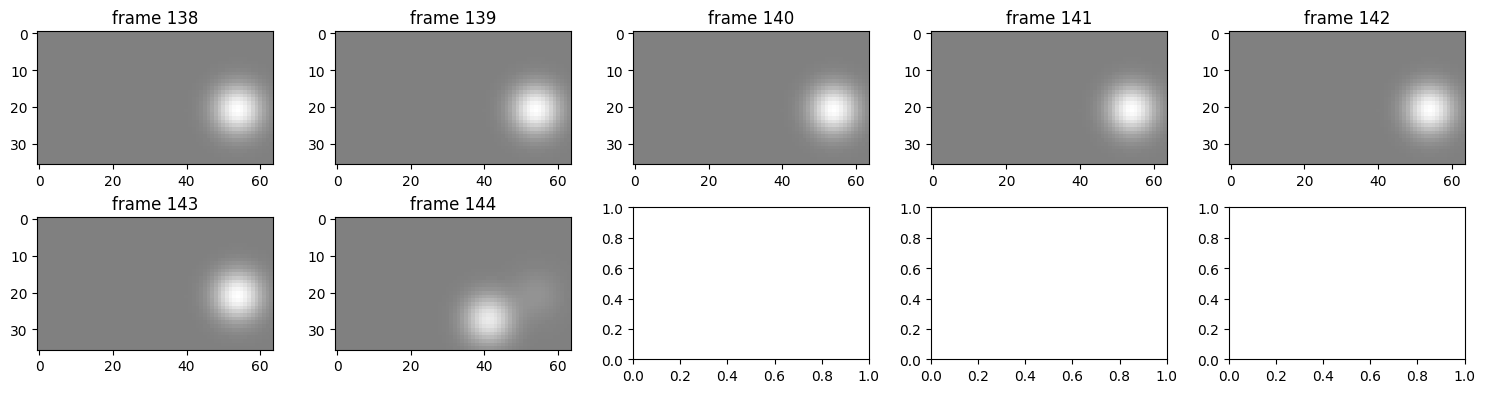

In [13]:
video = dat.load_video_by_trial(all_recording_folders[0],'464', try_global_first=False)
print(video.label)
fig, ax = video.plot_changes()
display(video.print_segments_table())
frames_plot = np.arange(138, 145).tolist()
fig, ax = video.plot_frames(frames_plot)


Metadata loaded from metadata per trial
First label: NaturalVideo
Current label: RandomDots


,frame_start,frame_end,duration,transition_start,transition_end,max_change,is_static,intensity_range,margin_left,margin_right,margin_top,margin_bottom,background_color,background_proportion,is_uniform,bad_properties
0,0,60,60,0,0,619.151090,False,153.0,0,0,0,0,128.0,0.660073,False,False
1,60,120,60,0,0,593.466056,False,153.0,0,0,0,0,128.0,0.611241,False,False
2,120,180,60,0,0,300.985460,False,153.0,0,0,0,0,128.0,0.589762,False,False
3,180,240,60,0,0,434.705958,False,153.0,0,0,0,0,128.0,0.572987,False,False


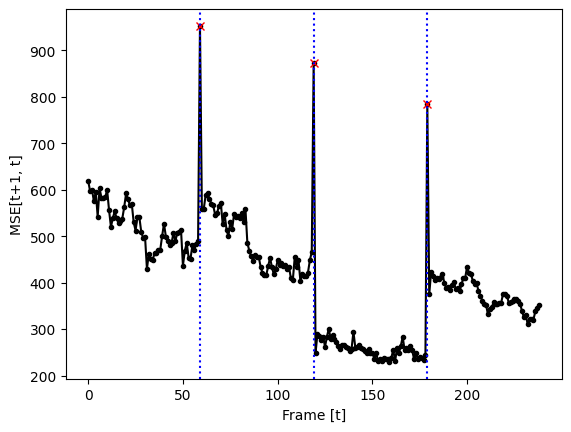

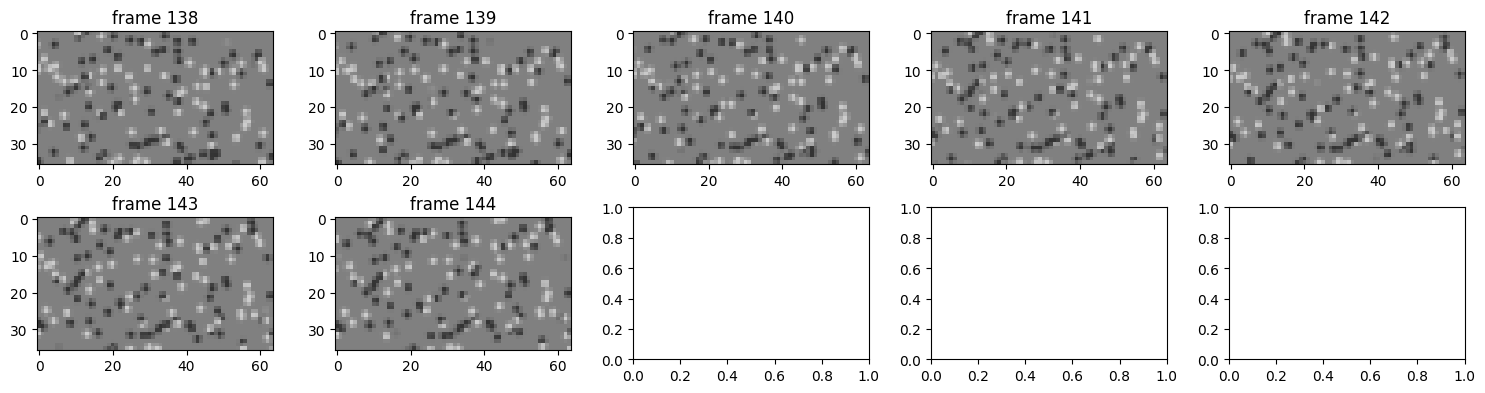

In [ ]:
video = dat.load_video_by_trial(all_recording_folders[0],'386', try_global_first=False)
print(f"First label: {video.first_label}")
print(f"Current label: {video.label}")
fig, ax = video.plot_changes()
display(video.print_segments_table())
frames_plot = np.arange(138, 145).tolist()
fig, ax = video.plot_frames(frames_plot)


Metadata loaded from metadata per trial
First label: PinkNoise
Current label: PinkNoise


,frame_start,frame_end,duration,transition_start,transition_end,max_change,is_static,intensity_range,margin_left,margin_right,margin_top,margin_bottom,background_color,background_proportion,is_uniform,bad_properties
0,0,27,27,0,0,442.264661,False,254.997406,0,0,0,0,117.960785,0.009848,False,False
1,27,54,27,0,0,480.808286,False,255.000000,0,0,0,0,137.035309,0.009159,False,False
2,54,81,27,0,0,453.283247,False,254.423752,0,0,0,0,131.011780,0.010120,False,False
3,81,108,27,0,0,418.090408,False,253.311493,0,0,0,0,142.054901,0.009960,False,False
4,108,135,27,0,0,451.281131,False,253.511505,0,0,0,0,136.031372,0.010648,False,False
5,135,162,27,0,0,409.011155,False,253.939468,0,0,0,0,133.019623,0.010168,False,False
6,162,189,27,0,0,422.674485,False,254.623276,0,0,0,0,121.976471,0.010120,False,False
7,189,216,27,0,0,404.710586,False,253.662247,0,0,0,0,121.976471,0.010152,False,False
8,216,243,27,0,0,395.865992,False,253.558945,0,0,0,0,129.003937,0.010488,False,False
9,243,270,27,0,0,413.672366,False,254.194122,0,0,0,0,130.007843,0.010168,False,False


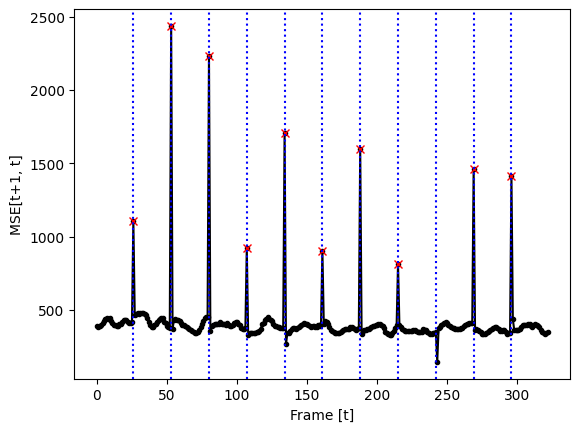

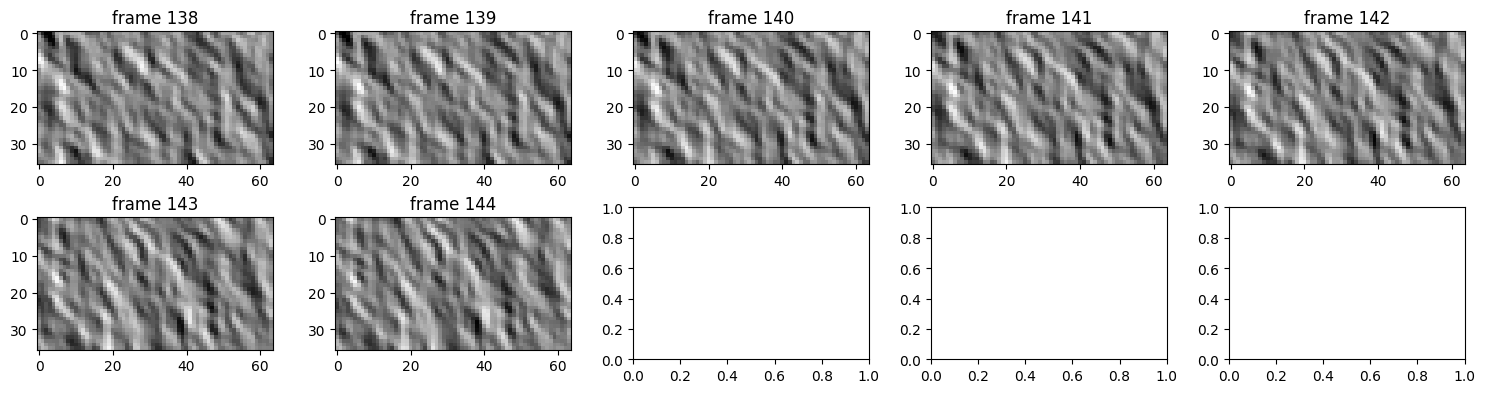

In [15]:
video = dat.load_video_by_trial(all_recording_folders[0],'633', try_global_first=False)
print(f"First label: {video.first_label}")
print(f"Current label: {video.label}")
fig, ax = video.plot_changes()
display(video.print_segments_table())
frames_plot = np.arange(138, 145).tolist()
fig, ax = video.plot_frames(frames_plot)


Metadata loaded from metadata per trial
First label: PinkNoise
Current label: PinkNoise


,frame_start,frame_end,duration,transition_start,transition_end,max_change,is_static,intensity_range,margin_left,margin_right,margin_top,margin_bottom,background_color,background_proportion,is_uniform,bad_properties
0,0,27,27,0,0,505.630458,False,254.539246,0,0,0,0,134.023529,0.009864,False,False
1,27,54,27,0,0,458.257801,False,254.518295,0,0,0,0,121.976471,0.009800,False,False
2,54,81,27,0,0,439.558590,False,254.994629,0,0,0,0,128.000000,0.009928,False,False
3,81,108,27,0,0,443.315349,False,254.863480,0,0,0,0,131.011780,0.010472,False,False
4,108,135,27,0,0,452.572220,False,254.160049,0,0,0,0,124.988235,0.010088,False,False
5,135,162,27,0,0,393.279571,False,254.722885,0,0,0,0,121.976471,0.010056,False,False
6,162,189,27,0,0,446.340390,False,255.000000,0,0,0,0,130.007843,0.010328,False,False
7,189,216,27,0,0,407.195257,False,254.336227,0,0,0,0,132.015686,0.010792,False,False
8,216,243,27,0,0,435.673479,False,252.989670,0,0,0,0,129.003937,0.010264,False,False
9,243,270,27,0,0,386.073926,False,252.778229,0,0,0,0,137.035309,0.009880,False,False


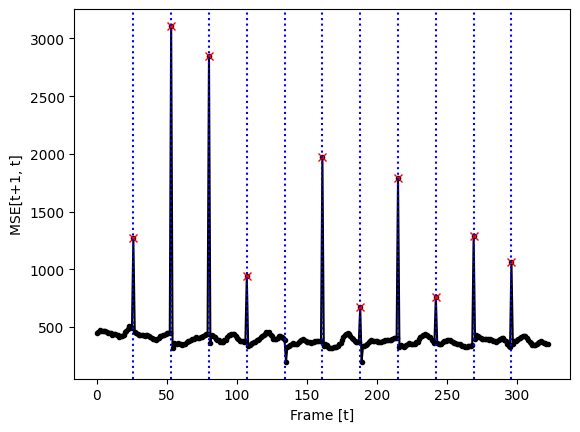

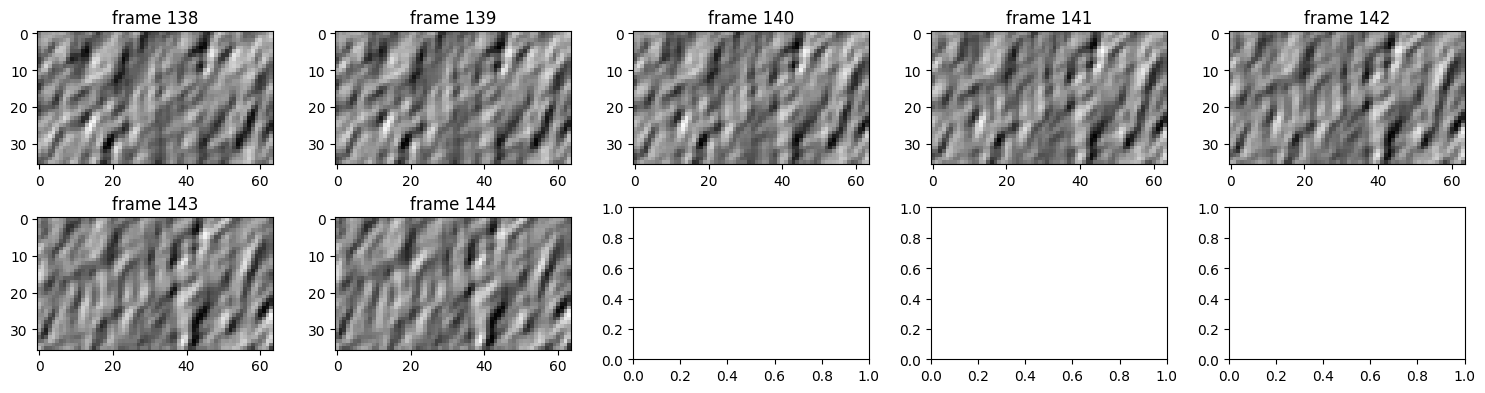

In [16]:
video = dat.load_video_by_trial(all_recording_folders[0],'169', try_global_first=False)
print(f"First label: {video.first_label}")
print(f"Current label: {video.label}")
fig, ax = video.plot_changes()
display(video.print_segments_table())
frames_plot = np.arange(138, 145).tolist()
fig, ax = video.plot_frames(frames_plot)

Metadata loaded from metadata per trial
First label: GaussianDot
Current label: GaussianDot


,frame_start,frame_end,duration,transition_start,transition_end,max_change,is_static,intensity_range,margin_left,margin_right,margin_top,margin_bottom,background_color,background_proportion,is_uniform,bad_properties
0,0,9,9,0,0,0.000000,True,127.031250,22,28,4,17,128.0,0.692591,False,False
1,9,18,9,0,0,0.079708,True,126.312500,9,41,11,11,128.0,0.670110,False,False
2,18,27,9,0,0,0.407295,True,128.427292,18,31,17,4,128.0,0.742117,False,False
3,27,36,9,0,0,0.678557,True,125.906250,6,44,14,8,128.0,0.728330,False,False
4,36,45,9,0,0,0.162836,True,126.281250,2,47,14,8,128.0,0.756432,False,False
5,45,54,9,0,0,2.357025,True,132.567764,12,37,4,17,128.0,0.687307,False,False
6,54,63,9,0,0,3.128303,True,127.031250,38,12,20,1,128.0,0.710028,False,False
7,63,72,9,0,0,1.972797,True,126.750000,41,9,14,7,128.0,0.671695,False,False
8,72,81,9,0,0,8.381401,True,128.712616,38,12,8,14,128.0,0.728186,False,False
9,81,90,9,0,0,7.190516,True,137.625488,22,27,10,11,128.0,0.660935,False,False


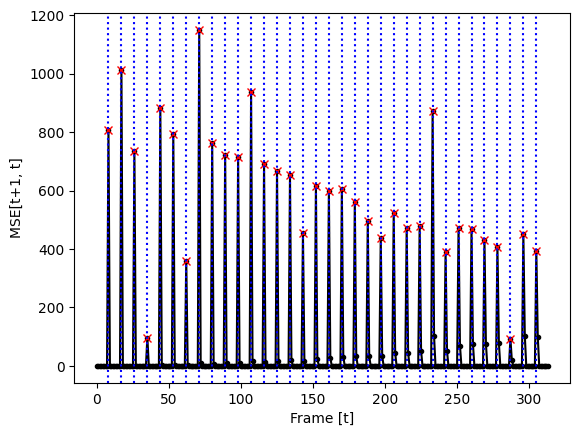

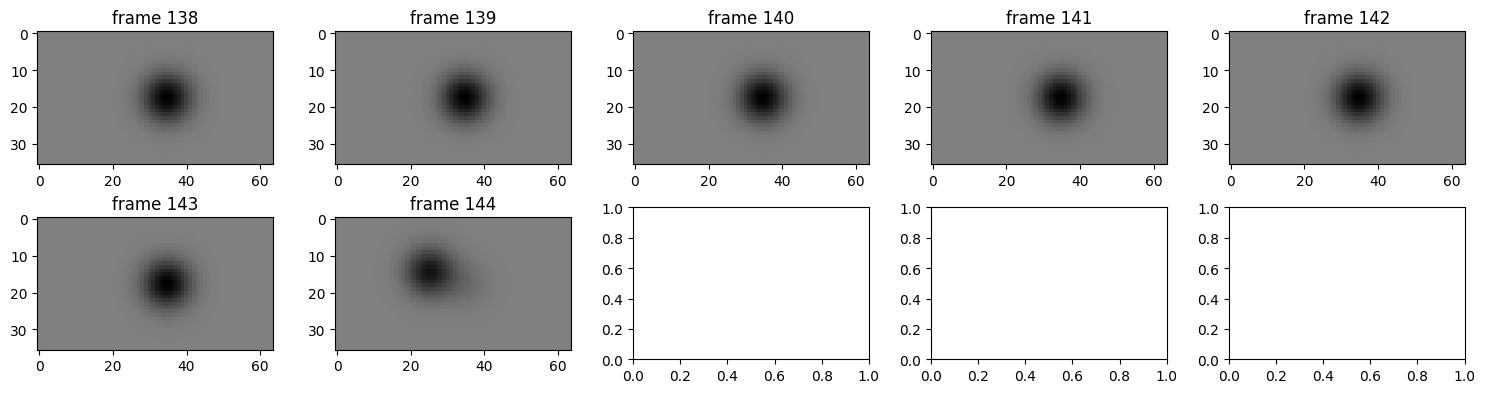

In [17]:
video = dat.load_video_by_trial(all_recording_folders[0],'348', try_global_first=False)
print(f"First label: {video.first_label}")
print(f"Current label: {video.label}")
fig, ax = video.plot_changes()
display(video.print_segments_table())
frames_plot = np.arange(138, 145).tolist()
fig, ax = video.plot_frames(frames_plot)



Metadata loaded from metadata per trial
First label: Gabor
Current label: Gabor


,frame_start,frame_end,duration,transition_start,transition_end,max_change,is_static,intensity_range,margin_left,margin_right,margin_top,margin_bottom,background_color,background_proportion,is_uniform,bad_properties
0,0,25,25,0,0,82.275427,False,216.627930,22,22,8,8,128.0,0.640643,False,False
1,25,50,25,0,0,10.035100,True,223.322815,22,22,8,8,128.0,0.637634,False,False
2,50,75,25,0,0,80.662151,False,213.635437,22,22,8,8,128.0,0.640487,False,False
3,75,100,25,0,0,36.853873,True,216.110352,22,22,8,8,128.0,0.640694,False,False
4,100,125,25,0,0,36.690193,True,214.721970,22,22,8,8,128.0,0.639190,False,False
5,125,150,25,0,0,9.886531,True,219.628220,22,22,10,9,128.0,0.641092,False,False
6,150,175,25,0,0,32.273671,True,222.739883,22,22,8,8,128.0,0.641715,False,False
7,175,200,25,0,0,77.495992,False,210.704193,22,22,8,8,128.0,0.641991,False,False
8,200,225,25,0,0,77.012695,False,209.484985,22,22,8,8,128.0,0.640452,False,False
9,225,250,25,0,0,29.636775,True,216.132660,22,22,8,8,128.0,0.643409,False,False


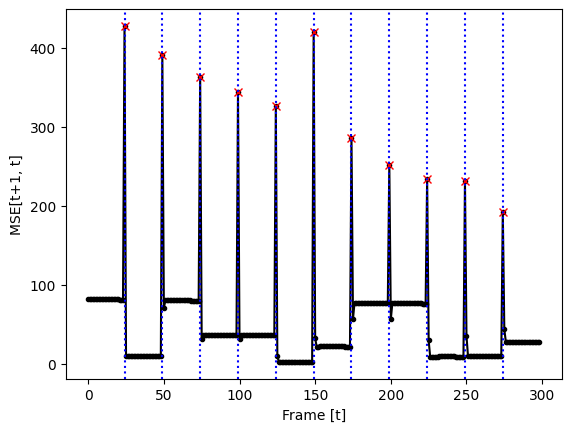

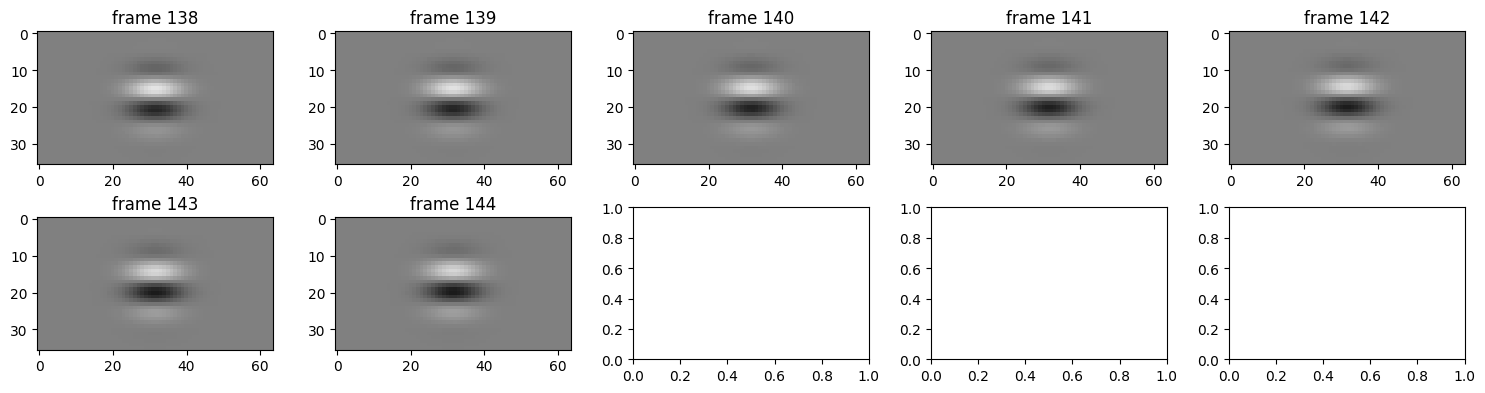

In [18]:
video = dat.load_video_by_trial(all_recording_folders[2],'27', try_global_first=False)
print(f"First label: {video.first_label}")
print(f"Current label: {video.label}")
fig, ax = video.plot_changes()
display(video.print_segments_table())
frames_plot = np.arange(138, 145).tolist()
fig, ax = video.plot_frames(frames_plot)


Metadata loaded from metadata per trial
First label: PinkNoise
Current label: PinkNoise


,frame_start,frame_end,duration,transition_start,transition_end,max_change,is_static,intensity_range,margin_left,margin_right,margin_top,margin_bottom,background_color,background_proportion,is_uniform,bad_properties
0,0,27,27,0,0,413.447653,False,254.654175,0,0,0,0,137.035309,0.009816,False,False
1,27,54,27,0,0,442.241735,False,254.983414,0,0,0,0,122.980392,0.010136,False,False
2,54,81,27,0,0,449.801474,False,253.383148,0,0,0,0,123.984314,0.010584,False,False
3,81,108,27,0,0,471.019369,False,254.950409,0,0,0,0,124.988235,0.010184,False,False
4,108,135,27,0,0,414.281627,False,254.980804,0,0,0,0,120.972549,0.010392,False,False
5,135,162,27,0,0,387.902107,False,254.076767,0,0,0,0,128.000000,0.010808,False,False
6,162,189,27,0,0,390.480642,False,253.500992,0,0,0,0,129.003937,0.010392,False,False
7,189,216,27,0,0,403.862948,False,254.794327,0,0,0,0,126.996078,0.010216,False,False
8,216,243,27,0,0,409.937972,False,254.924881,0,0,0,0,126.996078,0.010056,False,False
9,243,270,27,0,0,420.471588,False,254.994614,0,0,0,0,121.976471,0.011065,False,False


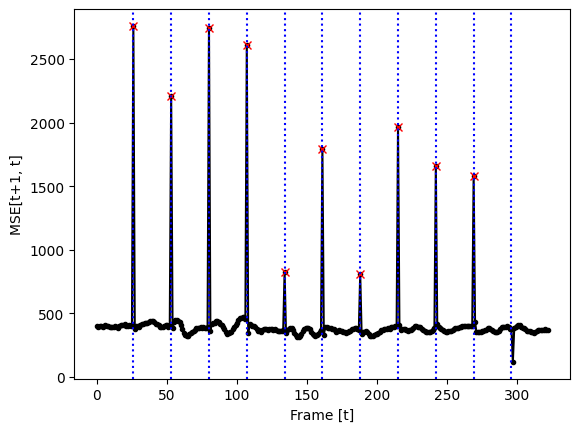

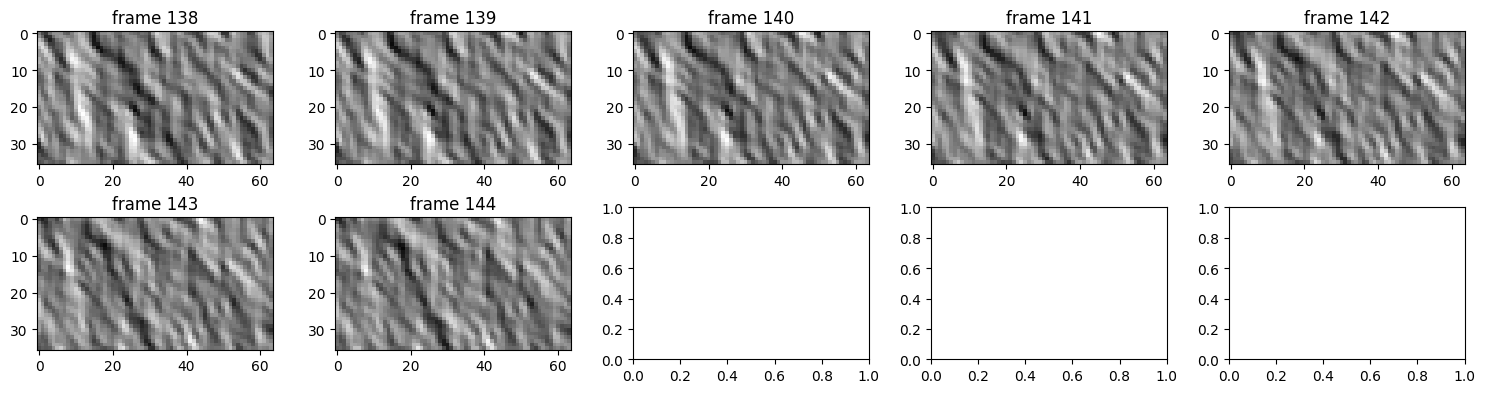

In [19]:
video = dat.load_video_by_trial(all_recording_folders[3],'623', try_global_first=False)
print(f"First label: {video.first_label}")
print(f"Current label: {video.label}")
fig, ax = video.plot_changes()
display(video.print_segments_table())
frames_plot = np.arange(138, 145).tolist()
fig, ax = video.plot_frames(frames_plot)


Metadata loaded from metadata per trial
First label: RandomDots
Current label: RandomDots


,frame_start,frame_end,duration,transition_start,transition_end,max_change,is_static,intensity_range,margin_left,margin_right,margin_top,margin_bottom,background_color,background_proportion,is_uniform,bad_properties
0,0,60,60,0,0,371.894110,False,153.0,0,0,0,0,128.0,0.637750,False,False
1,60,120,60,0,0,300.561307,False,153.0,0,0,0,0,128.0,0.614887,False,False
2,120,180,60,0,0,462.388021,False,153.0,0,0,0,0,128.0,0.621134,False,False
3,180,240,60,0,0,332.224669,False,153.0,0,0,0,0,128.0,0.654741,False,False


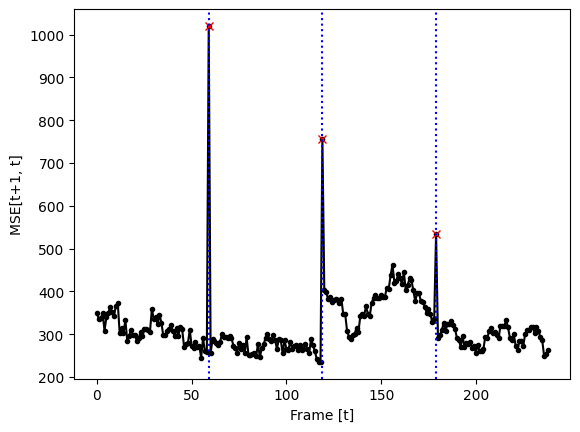

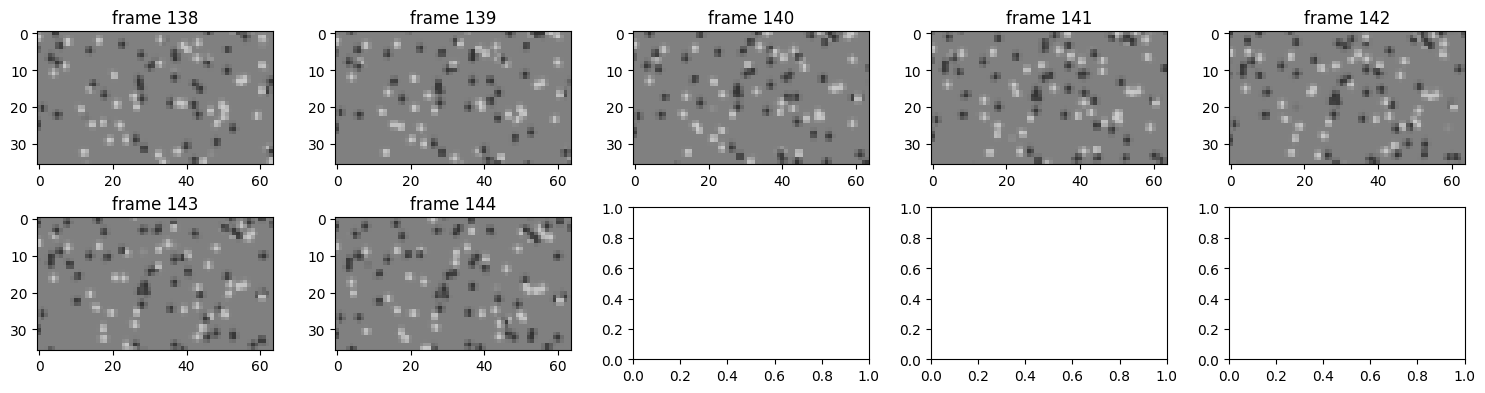

In [20]:
video = dat.load_video_by_trial(all_recording_folders[2],'515', try_global_first=False)
print(f"First label: {video.first_label}")
print(f"Current label: {video.label}")
fig, ax = video.plot_changes()
display(video.print_segments_table())
frames_plot = np.arange(138, 145).tolist()
fig, ax = video.plot_frames(frames_plot)


Metadata loaded from metadata per trial
First label: NaturalVideo
Current label: NaturalVideo


,frame_start,frame_end,duration,transition_start,transition_end,max_change,is_static,intensity_range,margin_left,margin_right,margin_top,margin_bottom,background_color,background_proportion,is_uniform,bad_properties
0,0,222,222,0,0,656.199490,False,231.436539,0,0,0,0,136.031372,0.016995,False,False
1,222,300,78,0,0,376.581355,False,235.115341,0,0,0,0,254.494110,0.024011,False,False


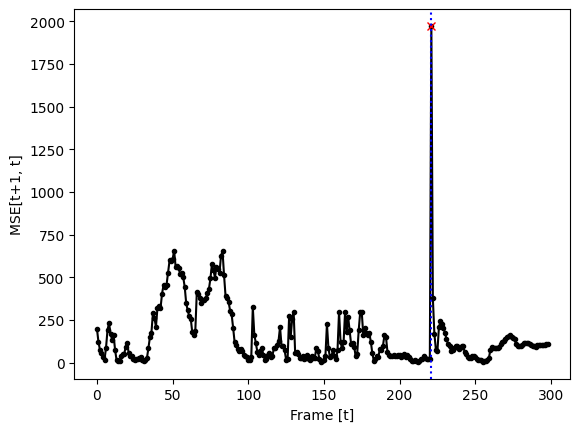

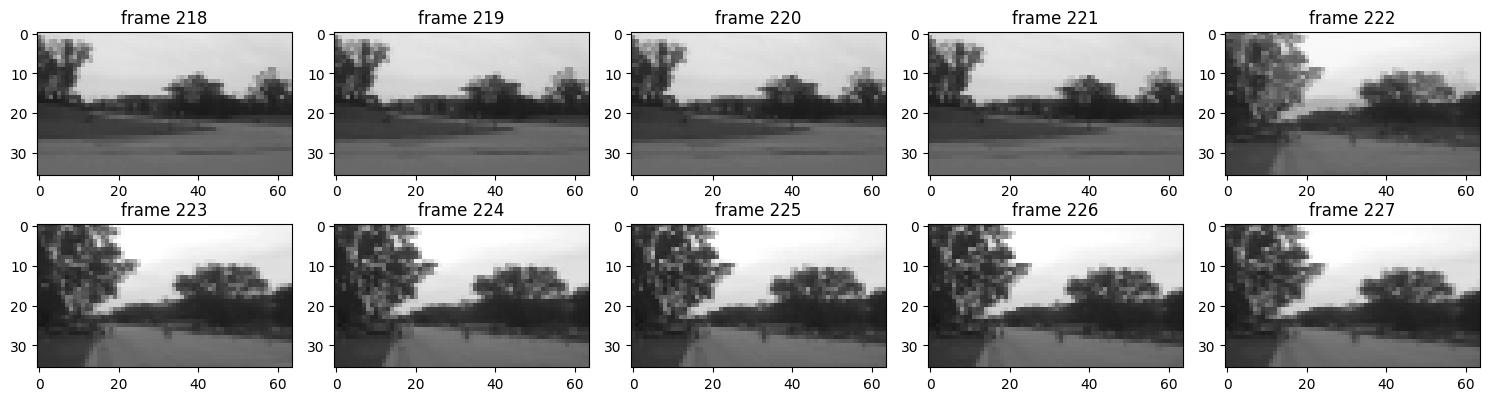

In [21]:
video = dat.load_video_by_trial(all_recording_folders[3],'35', try_global_first=False)
print(f"First label: {video.first_label}")
print(f"Current label: {video.label}")
fig, ax = video.plot_changes()
display(video.print_segments_table())
frames_plot = np.arange(218, 228).tolist()
fig, ax = video.plot_frames(frames_plot)

Metadata loaded from metadata per trial
First label: NaturalImages
Current label: NaturalImages


,frame_start,frame_end,duration,transition_start,transition_end,max_change,is_static,intensity_range,margin_left,margin_right,margin_top,margin_bottom,background_color,background_proportion,is_uniform,bad_properties
0,0,17,17,1,0,17.803334,True,16.352982,64,64,36,36,128.000000,0.937587,True,False
1,17,32,15,0,0,0.026276,True,245.687500,0,0,0,0,94.870590,0.019916,False,False
2,32,50,18,1,0,0.000000,True,0.000000,64,64,36,36,128.000000,0.996086,True,False
3,50,66,16,1,0,18.795763,True,201.125000,0,0,0,0,243.450989,0.020579,False,False
4,66,79,13,0,0,0.528931,True,1.996971,64,64,36,36,128.000000,0.943841,True,False
5,79,95,16,1,0,6.258757,True,210.250000,0,0,0,0,98.886276,0.012711,False,False
6,95,109,14,0,0,7.987018,True,11.676849,64,64,36,36,128.000000,0.903043,True,False
7,109,124,15,0,0,0.773072,True,221.500000,0,0,0,0,75.796082,0.021501,False,False
8,124,141,17,1,0,0.000000,True,0.000000,64,64,36,36,128.000000,0.996086,True,False
9,141,157,16,1,0,4.890777,True,248.687500,0,0,0,0,80.815689,0.017495,False,False


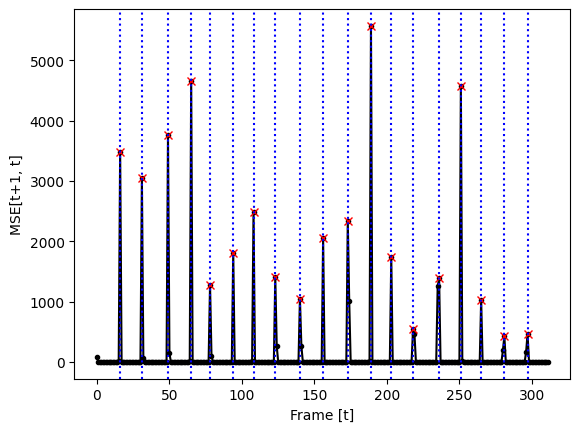

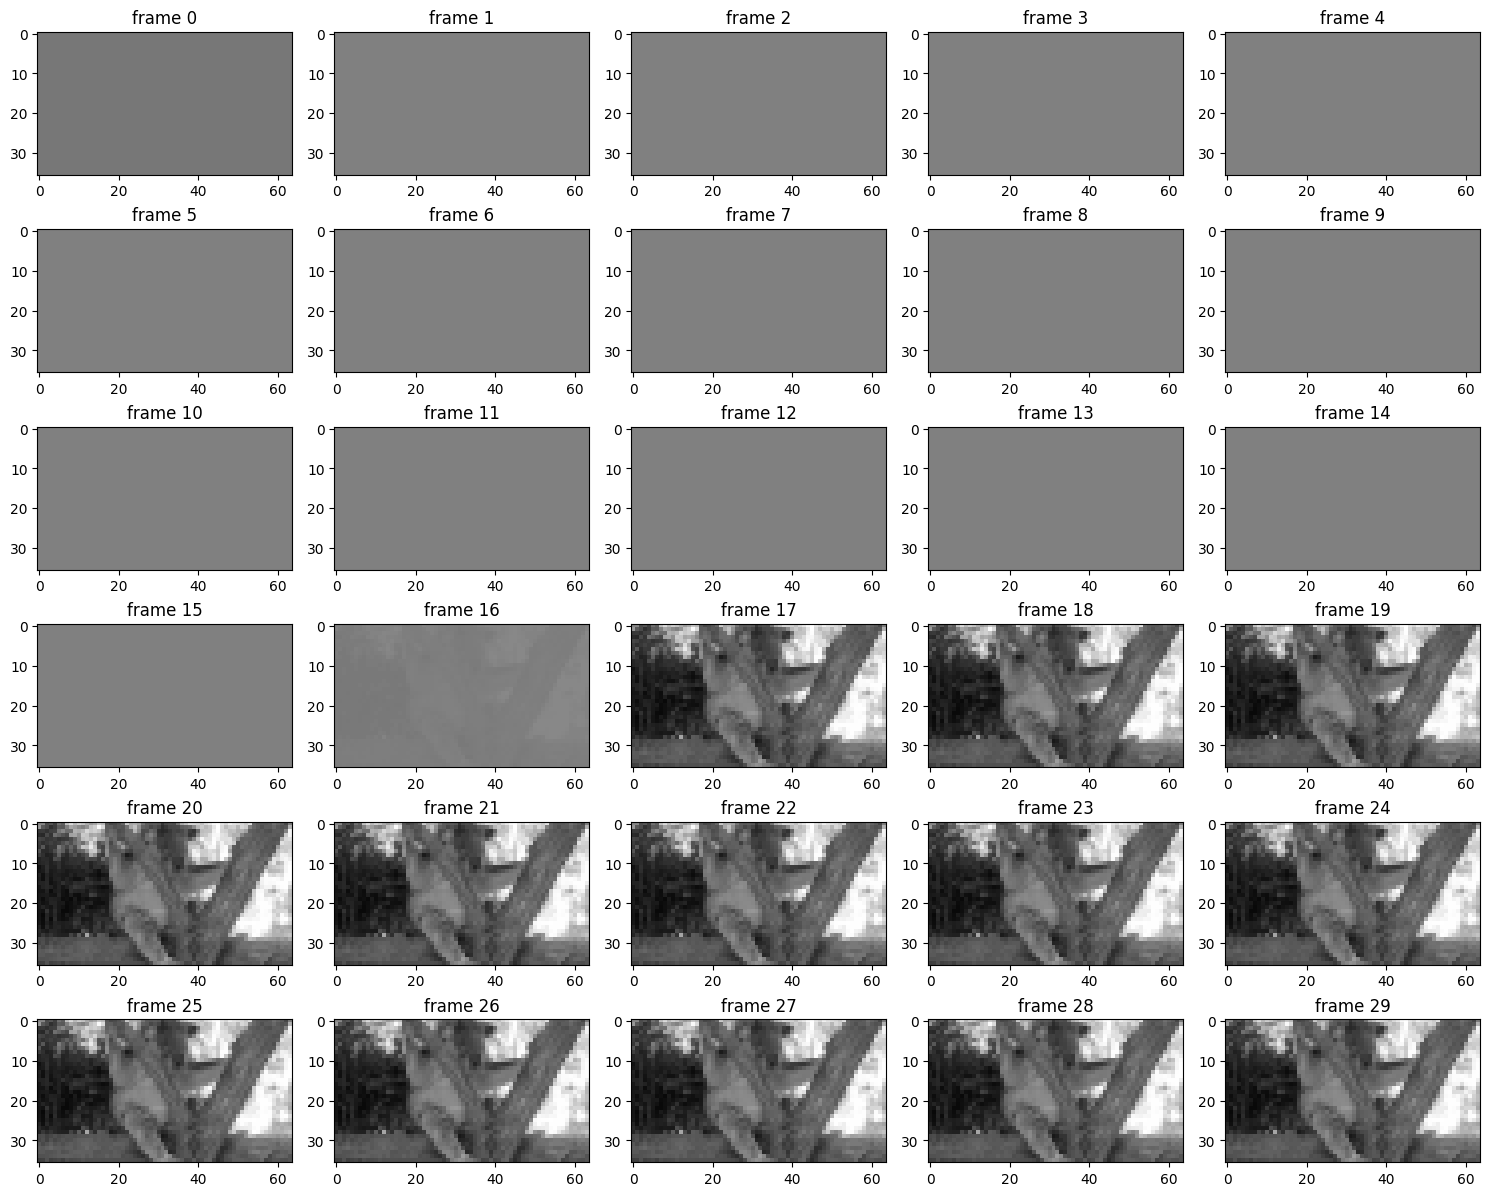

In [22]:
video = dat.load_video_by_trial(all_recording_folders[3],'660', try_global_first=False)
print(f"First label: {video.first_label}")
print(f"Current label: {video.label}")
fig, ax = video.plot_changes()
display(video.print_segments_table())
frames_plot = np.arange(0, 30).tolist()
fig, ax = video.plot_frames(frames_plot)
